<a href="https://colab.research.google.com/github/ElgunBabayev1/Deep-Learning/blob/main/Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py

--2024-09-18 12:06:03--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10247 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-09-18 12:06:03 (89.9 MB/s) - ‘helper_functions.py’ saved [10247/10247]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-09-18 12:06:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.207, 74.125.128.207, 74.125.143.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  33.8MB/s    in 5.4s    

2024-09-18 12:06:21 (29.6 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile

def uznip_data(filename):
  zip_ref=zipfile.ZipFile(filename,'r')
  zup_ref.extractall(),
  zip_ref.close

In [ ]:
unzip_data('/content/10_food_classes_10_percent.zip')

In [ ]:
walk_through_dir('/content/10_food_classes_10_percent')

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '/content/10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '/content/10_food_classe

In [ ]:
train_dir='/content/10_food_classes_10_percent/train'
test_dir='/content/10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_10_percent=tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                                  image_size=IMG_SIZE,
                                                                  label_mode='categorical',
                                                                  batch_size=BATCH_SIZE)

test_data=tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                                  image_size=IMG_SIZE,
                                                                  label_mode='categorical',
                                                                  batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for i in train_data_10_percent.take(1):
  print(i[0].shape)

(32, 224, 224, 3)


In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[1.17301025e+02 5.63010216e+01 9.76020336e+00]
   [1.15903061e+02 5.49030609e+01 7.99489689e+00]
   [1.16367348e+02 5.53673477e+01 8.36734676e+00]
   ...
   [2.25152836e+01 1.48060694e+01 3.86728787e+00]
   [1.58163452e+01 8.88268375e+00 3.12252378e+00]
   [1.59744177e+01 9.97441769e+00 1.26887732e+01]]

  [[1.11076530e+02 5.21224480e+01 8.03061104e+00]
   [1.00918365e+02 4.19846916e+01 4.38773751e-01]
   [1.12086731e+02 5.31581612e+01 9.01530457e+00]
   ...
   [2.25867767e+01 1.51582489e+01 7.65818405e+00]
   [1.48520136e+01 1.05815964e+01 2.13778043e+00]
   [1.38316994e+01 9.38269043e+00 1.15001392e+01]]

  [[1.04515305e+02 4.55153046e+01 3.94387722e+00]
   [1.05153061e+02 4.61530609e+01 4.58163118e+00]
   [1.05265305e+02 4.51173477e+01 3.76020336e+00]
   ...
   [1.59489050e+01 7.87758541e+00 3.16316891e+00]
   [1.62958946e+01 1.35407982e+01 4.07144165e+00]
   [1.09336462e+01 6.57646847e+00 9.36235714e+00]]

  ...

  [[9.07142830e+00 1.00714283e+01 2.07142830e+00]
   [8

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

#x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

x=base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

x=tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D {x.shape}')

outputs=tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

model_0=tf.keras.Model(inputs,outputs)

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10_percent=model_0.fit(train_data_10_percent,
                               batch_size=BATCH_SIZE,
                               epochs=5,
                               validation_data=test_data)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D (None, 1280)
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2928 - loss: 2.1053 - val_accuracy: 0.7004 - val_loss: 1.3602
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 37s 347ms/step - accuracy: 0.7380 - loss: 1.2196 - val_accuracy: 0.7808 - val_loss: 0.9541
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 518ms/step - accuracy: 0.8139 - loss: 0.9064 - val_accuracy: 0.8024 - val_loss: 0.7871
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 296ms/step - accuracy: 0.8615 - loss: 0.7146 - val_accuracy: 0.8120 - val_loss: 0.6990
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 305ms/step - accuracy: 0.8552 - loss: 0.6223 - val_accuracy: 0.8256 - val_loss: 0.6440


In [ ]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.8302 - loss: 0.6394


[0.6439629197120667, 0.8256000280380249]

In [ ]:
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, None, None, 3)  │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, None, None, 3)  │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, None, None, 3)  │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, None, None, 32) │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, None, None, 32) │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, None, None, 32) │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

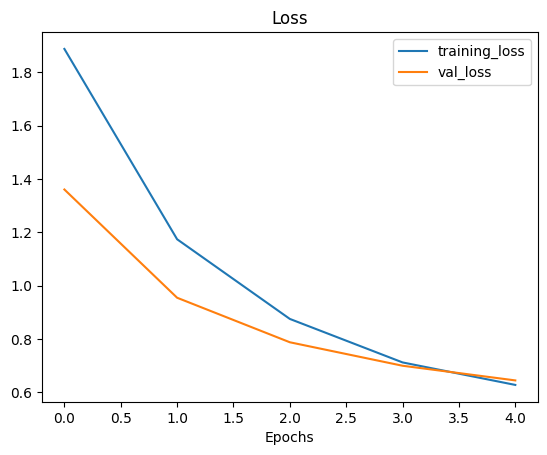

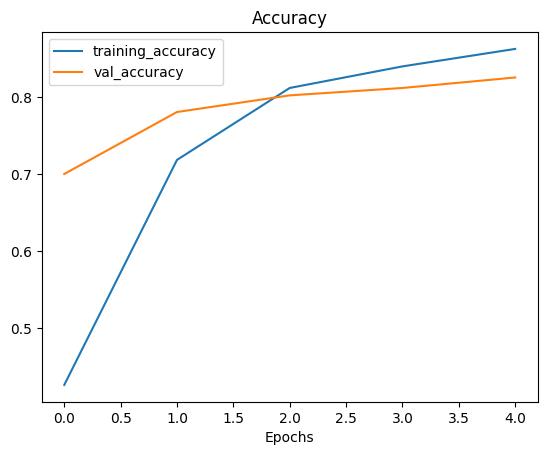

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-09-18 12:09:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  33.3MB/s    in 4.4s    

2024-09-18 12:09:18 (28.9 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("/content/10_food_classes_1_percent.zip")

In [ ]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/s

In [ ]:
train_dir="/content/10_food_classes_1_percent/train"
test_dir="/content/10_food_classes_1_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)
BATCH_SIZE=32

train_data_1_percent=tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMG_SIZE,

                                                                 label_mode='categorical',
                                                                 batch_size=BATCH_SIZE)

test_data=tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                      image_size=IMG_SIZE,
                                                      label_mode='categorical',
                                                      batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
history_1_percent=model_0.fit(train_data_1_percent,
                               batch_size=BATCH_SIZE,
                               epochs=5,
                               validation_data=test_data)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - accuracy: 0.8134 - loss: 0.6674 - val_accuracy: 0.8248 - val_loss: 0.6381
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.8316 - loss: 0.6575 - val_accuracy: 0.8276 - val_loss: 0.6324
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.8212 - loss: 0.5709 - val_accuracy: 0.8260 - val_loss: 0.6276
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.8479 - loss: 0.5224 - val_accuracy: 0.8236 - val_loss: 0.6248
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.8725 - loss: 0.5236 - val_accuracy: 0.8220 - val_loss: 0.6226


In [ ]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8243 - loss: 0.6293


[0.6226313710212708, 0.8220000267028809]

In [ ]:
model_0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

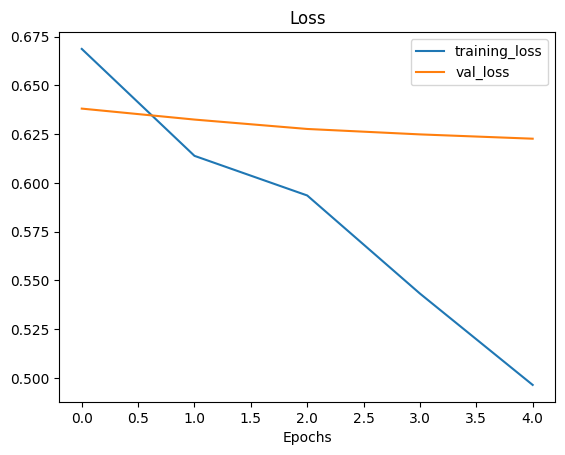

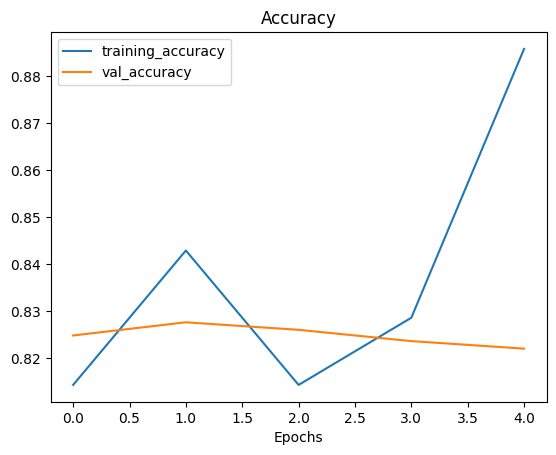

In [ ]:
plot_loss_curves(history_1_percent)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
],name="data_augmentation")

/content/10_food_classes_1_percent/train/fried_rice/492857.jpg


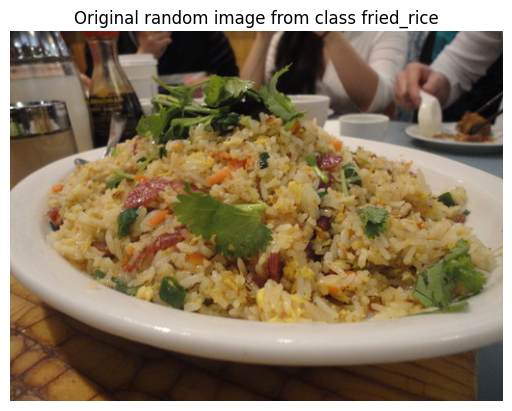

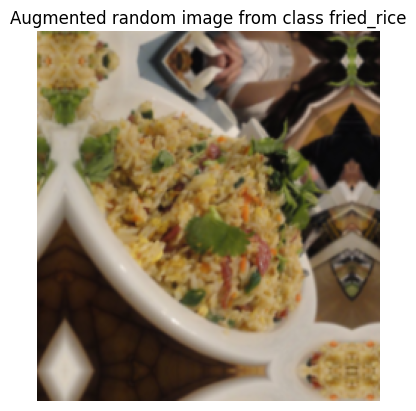

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class=random.choice(train_data_1_percent.class_names)
target_dir="/content/10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
print(random_image_path)

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Original random image from class {target_class}");

img=tf.image.resize(img,size=(224,224))
augmented_img=tf.squeeze(data_augmentation(tf.expand_dims(img,axis=0)))
plt.figure()
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)
plt.imshow(augmented_img/255.);

In [ ]:
tf.expand_dims(img,axis=0).shape

TensorShape([1, 224, 224, 3])

In [ ]:
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape,name="input_layer")

x=data_augmentation(inputs)

x=base_model(x,training=False)

x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              validation_data=test_data)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - accuracy: 0.0592 - loss: 2.4254 - val_accuracy: 0.1344 - val_loss: 2.2748
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.1073 - loss: 2.2560 - val_accuracy: 0.2040 - val_loss: 2.1563
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.2685 - loss: 2.0616 - val_accuracy: 0.2684 - val_loss: 2.0606
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3381 - loss: 1.8682 - val_accuracy: 0.3280 - val_loss: 1.9763
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.6112 - loss: 1.7227 - val_accuracy: 0.3752 - val_loss: 1.9014


In [ ]:
train_dir_10_percent="/content/10_food_classes_10_percent/train"
test_dir="/content/10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)

train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode='categorical')

test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation=Sequential([
    layers.Input(shape=input_shape),
    layers.RandomFlip('horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
    #layers.Rescaling(1./255)
],name='data_augmentation')

data_augmentation.summary()

Model: "data_augmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_height_3 (RandomHeight)       │ (None, None, 224, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_width_3 (RandomWidth)         │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_3 (RandomZoom)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_2 (RandomRotation)   │ (None, None, None, 3)       │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape,name="input_layer")

x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)

outputs=tf.keras.layers.Dense(10,activation='softmax',name="output_layer")(x)
model_2=tf.keras.Model(inputs,outputs)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

initial_epochs=5

history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        validation_data=test_data)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 505ms/step - accuracy: 0.1952 - loss: 2.2310 - val_accuracy: 0.6104 - val_loss: 1.5788
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 570ms/step - accuracy: 0.5763 - loss: 1.5482 - val_accuracy: 0.7272 - val_loss: 1.1617
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 594ms/step - accuracy: 0.7129 - loss: 1.2236 - val_accuracy: 0.7556 - val_loss: 0.9630
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 400ms/step - accuracy: 0.7598 - loss: 0.9951 - val_accuracy: 0.7816 - val_loss: 0.8402
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.7768 - loss: 0.8875 - val_accuracy: 0.7848 - val_loss: 0.7791


In [ ]:
results_10_percent_aug=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.7907 - loss: 0.7622


In [ ]:
model_2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ data_augmentation (Sequential)       │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_2D            │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

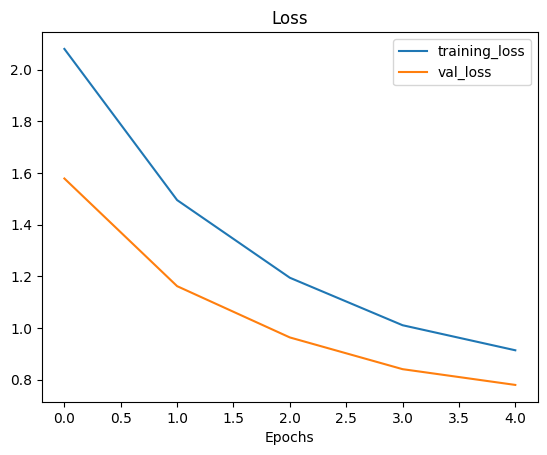

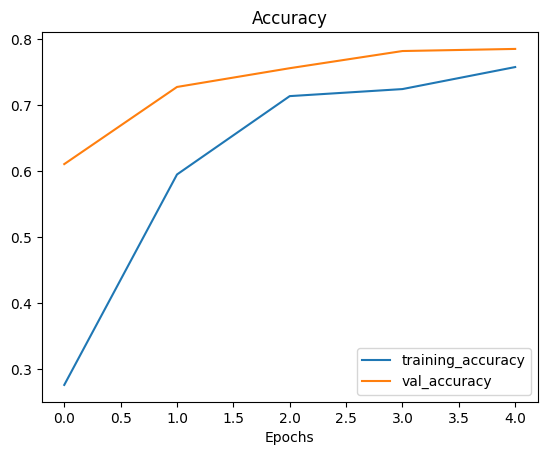

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
checkpoint_path="10_percent_model_checkpoints_wrights/checkpoint.weights.h5"
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=True,
                                                       save_freq='epoch',
                                                       verbose=1)

In [ ]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=input_shape,name="input_layer")

x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)

outputs=tf.keras.layers.Dense(10,activation='softmax',name="output_layer")(x)
model_2=tf.keras.Model(inputs,outputs)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

initial_epochs=5

history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        validation_data=test_data,
                                        callbacks=[checkpoint_callback])

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2121 - loss: 2.1792
Epoch 1: val_loss improved from inf to 1.52052, saving model to 10_percent_model_checkpoints_wrights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 710ms/step - accuracy: 0.2154 - loss: 2.1736 - val_accuracy: 0.6496 - val_loss: 1.5205
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6218 - loss: 1.5007
Epoch 2: val_loss improved from 1.52052 to 1.12563, saving model to 10_percent_model_checkpoints_wrights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 612ms/step - accuracy: 0.6221 - loss: 1.4983 - val_accuracy: 0.7408 - val_loss: 1.1256
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7149 - loss: 1.1803
Epoch 3: val_loss improved from 1.12563 to 0.93238, saving model to 10_percent_model_checkpoints_wrights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.7140 - loss: 1.1794 - val_accuracy: 0.7724 - val_loss: 0.9324
Epoch 4/5
24/2

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_result=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.7940 - loss: 0.7569


In [ ]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=data_augmentation, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling_2D, built=True> True
<Dense name=output_layer, built=True> True


In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_14 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sq

In [ ]:
base_model.trainable=False
for layer in base_model.layers[-10:]:
  layer.trainable=True

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [ ]:
for i,layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_14 False
1 rescaling_20 False
2 normalization_10 False
3 rescaling_21 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_sq

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
fine_tune_epochs=initial_epochs+5

history_fine_10_percent_aug=model_2.fit(train_data_10_percent,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_data,
                                        initial_epoch=history_10_percent_data_aug.epoch[-1])

Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 706ms/step - accuracy: 0.7399 - loss: 0.9311 - val_accuracy: 0.7916 - val_loss: 0.7078
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step - accuracy: 0.8091 - loss: 0.7345 - val_accuracy: 0.8164 - val_loss: 0.6233
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.8398 - loss: 0.6397 - val_accuracy: 0.8316 - val_loss: 0.5666
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 391ms/step - accuracy: 0.8268 - loss: 0.5920 - val_accuracy: 0.8400 - val_loss: 0.5229
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.8823 - loss: 0.5535 - val_accuracy: 0.8448 - val_loss: 0.4913
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.8707 - loss: 0.5060 - val_accuracy: 0.8512 - val_loss: 0.4707


In [ ]:
results_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.8646 - loss: 0.4362


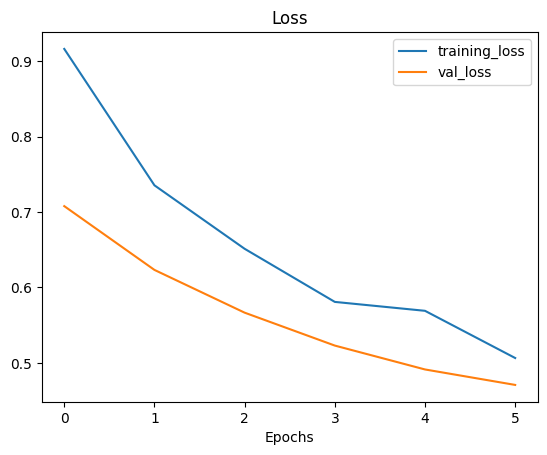

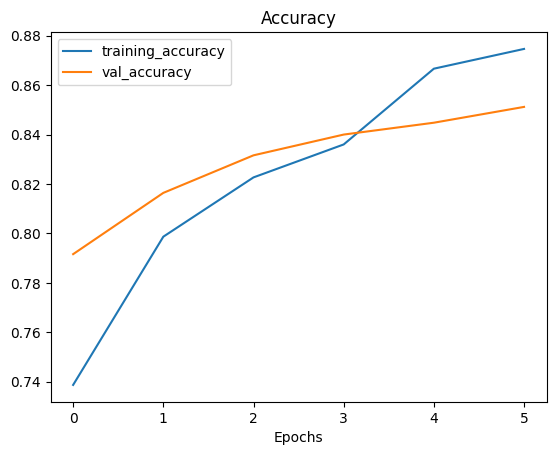

In [ ]:
plot_loss_curves(history_fine_10_percent_aug)